# Solved midpoints?
> Itsik claims to have solved the midpoint problem analytically. Does it work?

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$
\begin{align}
A &:= \theta_1,\\
B &:= \theta_2,\\
M &:= \theta_m,\\
C &:= \cos(A) \cos(B),\\
D &:= \cos(A) - \cos(B),\\
E &:= \sin(A)-\sin(B),\\
T &:= \tan(M).
\end{align}
$$

Starting with the initial equations, we reach:

$$
\begin{align}
\cos^2(M) C D - \sin^2(M) D (1 + C) - 2 \cos(M) \sin(M) C E &= 0, \\
C D - \tan^2(M) D (1 + C) - 2 \tan(M) C E &= 0, \\
1 - \tan^2(M) (1 + 1/C) - 2 \tan(M) E/D &= 0.   \hspace{10mm} &(0 < A,B < \pi/2)
\end{align}
$$

Substituting $T = \tan(M)$ in the above equation:

$$
\begin{align}
(1+1/C) T^2 + 2(E/D) T - 1 &= 0, \\
T &= \frac{- E/D \pm \sqrt{ (E/D)^2 + (1+1/C) }}{ (1+1/C)}.
\end{align}
$$

Next, evaluating $E/D$:

$$
\begin{align}
\frac{E}{D} &= \frac{(\cos(A)-\cos(B))/(\sin(A)-\sin(B))}{-2\sin((A+B)/2)\sin((A-B)/2) / 2\cos((A+B)/2)\sin((A-B)/2)} \\
&= -\tan((A+B)/2).
\end{align}
$$

Further simplification gives:

$$
\begin{align}
(E/D)^2 &= \frac{(1-\cos (A+B))/(1+\cos(A+B))}{-1+2/(1+\cos(A+B))}, \\
C &= \frac{(\cos (A+B) + \cos (A-B) )}{2}.
\end{align}
$$

Finally, plugging these expressions back into the quadratic equation for $T$:

$$
\begin{align}
T &= \frac{\tan((A+B)/2) \pm \sqrt{2}\sqrt{ 1/(1+\cos(A+B)) + 1/(\cos (A+B) + \cos (A-B) )  }}{ (1+1/C)}.
\end{align}
$$

The expression inside the square root might simplify further with some additional trigonometric identities or algebraic manipulations.

In [135]:
import numpy as np

# theta_1 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_1 = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)
# theta_2 = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2 = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)


def is_midpoint(t1, t2, tm):
    return np.allclose(
        np.cos(t2) * np.cos(t1 + tm) ** 2,
        np.cos(t1) * np.cos(t2 + tm) ** 2,
        atol=1e-5,
    ) and (t2 <= tm <= t1 or t1 <= tm <= t2)


def get_midpoint(a, b):
    if np.isclose(a, b):
        return [a]

    c = np.cos(a) * np.cos(b)
    d = np.cos(a) - np.cos(b)
    e = np.sin(a) - np.sin(b)

    if np.isclose(c, 0):
        print("c is close to 0")

    t1 = -e / d
    t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))
    t3 = 1 + 1 / c

    if np.isnan(t1):
        print("t1 is nan")
    if np.isnan(t2):
        print("t2 is nan", 1 / c)
    if np.isnan(t3):
        print("t3 is nan")

    # t1 = np.tan((a + b) / 2)
    # t2 = np.sqrt(2) * np.sqrt(1 / (1 + np.cos(a + b)) + 1 / (np.cos(a + b) + np.cos(a - b)))
    # t3 = 1 + 1 / c

    T_solutions = [(t1 + t2) / t3, (t1 - t2) / t3]  # quadratic
    M_solutions = [np.arctan(t) for t in T_solutions]  # since T := tan(M)

    return M_solutions


for t1 in theta_1:
    for t2 in theta_2:
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)

No midpoint found for 0.7863981633974483 0.7943112761590386
No midpoint found for 0.7863981633974483 0.8022243889206291
No midpoint found for 0.7863981633974483 0.8101375016822194
No midpoint found for 0.7863981633974483 0.8180506144438098
No midpoint found for 0.7863981633974483 0.8259637272054002
No midpoint found for 0.7863981633974483 0.8338768399669906
No midpoint found for 0.7863981633974483 0.841789952728581
No midpoint found for 0.7863981633974483 0.8497030654901714
No midpoint found for 0.7863981633974483 0.8576161782517617
No midpoint found for 0.7863981633974483 0.8655292910133522
No midpoint found for 0.7863981633974483 0.8734424037749425
No midpoint found for 0.7863981633974483 0.881355516536533
No midpoint found for 0.7863981633974483 0.8892686292981233
No midpoint found for 0.7863981633974483 0.8971817420597137
No midpoint found for 0.7863981633974483 0.9050948548213041
No midpoint found for 0.7863981633974483 0.9130079675828945
No midpoint found for 0.7863981633974483 0

In [79]:
# Verify for pi/2 to 3pi/4:

theta_1_b = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 101)
theta_2_b = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 101)

for t1 in theta_1_b:
    for t2 in theta_2_b:
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)
        print(f"{t1 / np.pi:.2f}, {midpoints[0] / np.pi:.2f}, {t2 / np.pi:.2f}")

0.50, 0.50, 0.50
0.50, 0.00, 0.50
0.50, 0.00, 0.51
0.50, 0.00, 0.51
0.50, 0.00, 0.51
0.50, 0.00, 0.51
0.50, 0.00, 0.52
0.50, 0.00, 0.52
0.50, 0.00, 0.52
0.50, 0.00, 0.52
0.50, 0.00, 0.53
0.50, 0.00, 0.53
0.50, 0.00, 0.53
0.50, 0.00, 0.53
0.50, 0.00, 0.54
0.50, 0.00, 0.54
0.50, 0.00, 0.54
0.50, 0.00, 0.54
0.50, 0.00, 0.55
0.50, 0.00, 0.55
0.50, 0.00, 0.55
0.50, 0.00, 0.55
0.50, 0.00, 0.56
0.50, 0.00, 0.56
0.50, 0.00, 0.56
0.50, 0.00, 0.56
0.50, 0.00, 0.57
0.50, 0.00, 0.57
0.50, 0.00, 0.57
0.50, 0.00, 0.57
0.50, 0.00, 0.58
0.50, 0.00, 0.58
0.50, 0.01, 0.58
0.50, 0.01, 0.58
0.50, 0.01, 0.59
0.50, 0.01, 0.59
0.50, 0.01, 0.59
0.50, 0.01, 0.59
0.50, 0.01, 0.60
0.50, 0.01, 0.60
0.50, 0.01, 0.60
0.50, 0.01, 0.60
0.50, 0.01, 0.61
0.50, 0.01, 0.61
0.50, 0.01, 0.61
0.50, 0.01, 0.61
0.50, 0.01, 0.62
0.50, 0.01, 0.62
0.50, 0.01, 0.62
0.50, 0.01, 0.62
0.50, 0.01, 0.62
0.50, 0.01, 0.63
0.50, 0.01, 0.63
0.50, 0.01, 0.63
0.50, 0.01, 0.63
0.50, 0.01, 0.64
0.50, 0.01, 0.64
0.50, 0.01, 0.64
0.50, 0.01, 0.

/tmp/ipykernel_2843372/1513538373.py:29: RuntimeWarning: invalid value encountered in sqrt
  t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))


t2 is nan -178.67051834353407
No midpoint found for 0.7863981633974483 1.5787195405665881
t2 is nan -59.56182485222528
No midpoint found for 0.7863981633974483 1.5945659681099709
t2 is nan -35.74307844833767
No midpoint found for 0.7863981633974483 1.6104123956533538
t2 is nan -25.53718313146039
No midpoint found for 0.7863981633974483 1.6262588231967365
t2 is nan -19.868906598355633
No midpoint found for 0.7863981633974483 1.6421052507401193
t2 is nan -16.26318597394365
No midpoint found for 0.7863981633974483 1.657951678283502
t2 is nan -13.76807440631753
No midpoint found for 0.7863981633974483 1.673798105826885
t2 is nan -11.93933038602892
No midpoint found for 0.7863981633974483 1.6896445333702677
t2 is nan -10.541767546128847
No midpoint found for 0.7863981633974483 1.7054909609136506
t2 is nan -9.439225641357028
No midpoint found for 0.7863981633974483 1.7213373884570333
t2 is nan -8.547415253715567
No midpoint found for 0.7863981633974483 1.737183816000416
t2 is nan -7.81136526

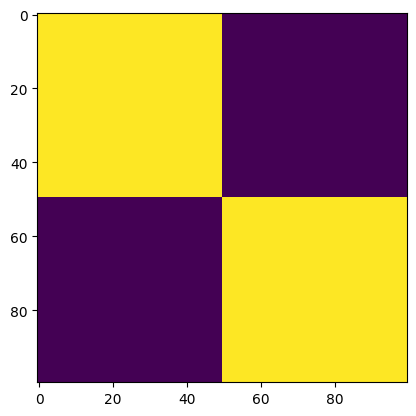

In [49]:
# Across the whole range:
import matplotlib.pyplot as plt

theta_1_c = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)

In [ ]:
# Specifically when theta_1 and theta_2 land in different quadrants:
import matplotlib.pyplot as plt

theta_1_c = np.linspace(np.pi / 4 + 0.001, *np.pi / 2 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            print("No midpoint found for", t1, t2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)

No midpoint found for 0.250, 0.625, 0.500
-0.603803088774937
No midpoint found for 0.250, 0.623, 0.503
-0.6085481204625738
No midpoint found for 0.250, 0.622, 0.505
-0.6132323438110302
No midpoint found for 0.250, 0.621, 0.508
-0.6178549531330806
No midpoint found for 0.250, 0.620, 0.510
-0.6224151551838448
No midpoint found for 0.250, 0.618, 0.513
-0.6269121693366404
No midpoint found for 0.250, 0.617, 0.515
-0.6313452277558637
No midpoint found for 0.250, 0.616, 0.518
-0.635713575566855
No midpoint found for 0.250, 0.615, 0.520
-0.6400164710227126
No midpoint found for 0.250, 0.613, 0.523
-0.6442531856680079
No midpoint found for 0.250, 0.612, 0.526
-0.6484230044993674
No midpoint found for 0.250, 0.611, 0.528
-0.6525252261228838
No midpoint found for 0.250, 0.610, 0.531
-0.6565591629083076
No midpoint found for 0.250, 0.608, 0.533
-0.6605241411400011
No midpoint found for 0.250, 0.607, 0.536
-0.6644195011645937
No midpoint found for 0.250, 0.606, 0.538
-0.6682445975353288
No midpoin

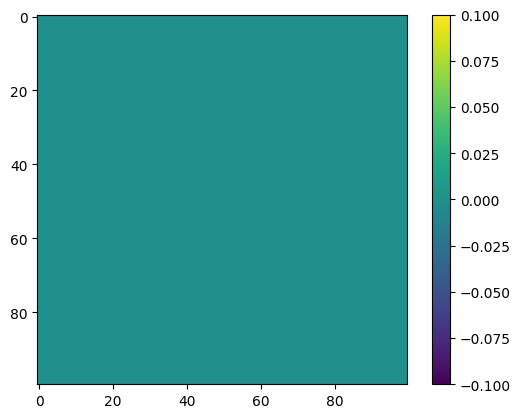

In [92]:
# Oh okay, I think this works!!!!!


def get_midpoint_cot(a, b):
    if np.isclose(a, b):
        return [a]

    c = np.cos(a) * np.cos(b)
    d = np.cos(a) - np.cos(b)
    e = np.sin(a) - np.sin(b)

    if np.isclose(c, 0):
        print("c is close to 0")

    # t1 = -e / d
    # t2 = np.sqrt((e / d) ** 2 + (1 + 1 / c))
    # t3 = 1 + 1 / c
    t1 = c * d
    t2 = -2 * c * e
    t3 = -d * (1 + c)

    if np.isnan(t1):
        print("t1 is nan")
    if np.isnan(t2):
        print("t2 is nan", 1 / c)
    if np.isnan(t3):
        print("t3 is nan")

    # t1 = np.tan((a + b) / 2)
    # t2 = np.sqrt(2) * np.sqrt(1 / (1 + np.cos(a + b)) + 1 / (np.cos(a + b) + np.cos(a - b)))
    # t3 = 1 + 1 / c

    # T_solutions = [(t1 + t2) / t3, (t1 - t2) / t3]  # quadratic
    T_solutions = np.roots([t1, t2, t3])
    M_solutions = np.array([np.arctan2(1, np.real(T)) for T in T_solutions])

    # Fix to [0, pi]:
    M_solutions[M_solutions < 0] += np.pi

    return M_solutions


# Specifically when theta_1 and theta_2 land in different quadrants:
theta_1_c = np.linspace(np.pi / 4 + 0.001, np.pi / 2 - 0.001, 100)
theta_2_c = np.linspace(np.pi / 2 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_c), len(theta_2_c)))
for i, t1 in enumerate(theta_1_c):
    for j, t2 in enumerate(theta_2_c):
        midpoints = get_midpoint_cot(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            tm = midpoints[0]
            print(f"No midpoint found for {t1 / np.pi:.3f}, {tm / np.pi:.3f}, {t2 / np.pi:.3f}")
            print(np.cos(t2) * np.cos(t1 + tm) ** 2 - np.cos(t1) * np.cos(t2 + tm) ** 2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)
plt.colorbar()

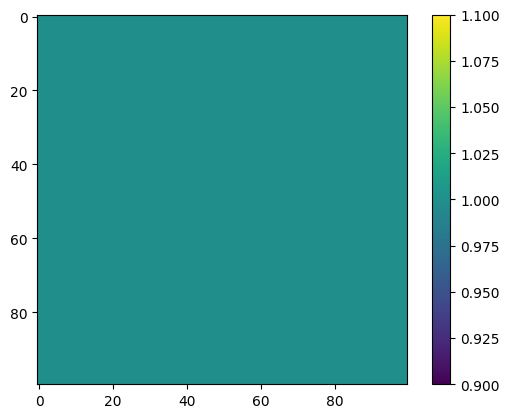

In [64]:
# Sanity check: full range of theta_1 and theta_2 in H2,1:

theta_1_d = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)
theta_2_d = np.linspace(np.pi / 4 + 0.001, 3 * np.pi / 4 - 0.001, 100)

my_grid = np.zeros((len(theta_1_d), len(theta_2_d)))
for i, t1 in enumerate(theta_1_d):
    for j, t2 in enumerate(theta_2_d):
        midpoints = get_midpoint_cot(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            tm = midpoints[0]
            print(f"No midpoint found for {t1 / np.pi:.3f}, {tm / np.pi:.3f}, {t2 / np.pi:.3f}")
            print(np.cos(t2) * np.cos(t1 + tm) ** 2 - np.cos(t1) * np.cos(t2 + tm) ** 2)
        else:
            my_grid[i, j] = 1

plt.imshow(my_grid)
plt.colorbar()

No midpoint found for 0.000, 0.998, 0.010
0.0
No midpoint found for 0.000, 0.995, 0.020
2.220446049250313e-16
No midpoint found for 0.000, 0.993, 0.030
-1.1102230246251565e-16
No midpoint found for 0.000, 0.990, 0.040
2.220446049250313e-16
No midpoint found for 0.000, 0.988, 0.050
1.1102230246251565e-16
No midpoint found for 0.000, 0.985, 0.060
0.0
No midpoint found for 0.000, 0.983, 0.070
2.220446049250313e-16
No midpoint found for 0.000, 0.980, 0.080
1.1102230246251565e-16
No midpoint found for 0.000, 0.978, 0.090
-1.1102230246251565e-16
No midpoint found for 0.000, 0.975, 0.100
0.0
No midpoint found for 0.000, 0.973, 0.110
1.1102230246251565e-16
No midpoint found for 0.000, 0.970, 0.120
-1.1102230246251565e-16
No midpoint found for 0.000, 0.968, 0.130
-1.1102230246251565e-16
No midpoint found for 0.000, 0.965, 0.140
1.1102230246251565e-16
No midpoint found for 0.000, 0.963, 0.150
2.220446049250313e-16
No midpoint found for 0.000, 0.961, 0.160
-1.1102230246251565e-16
No midpoint foun

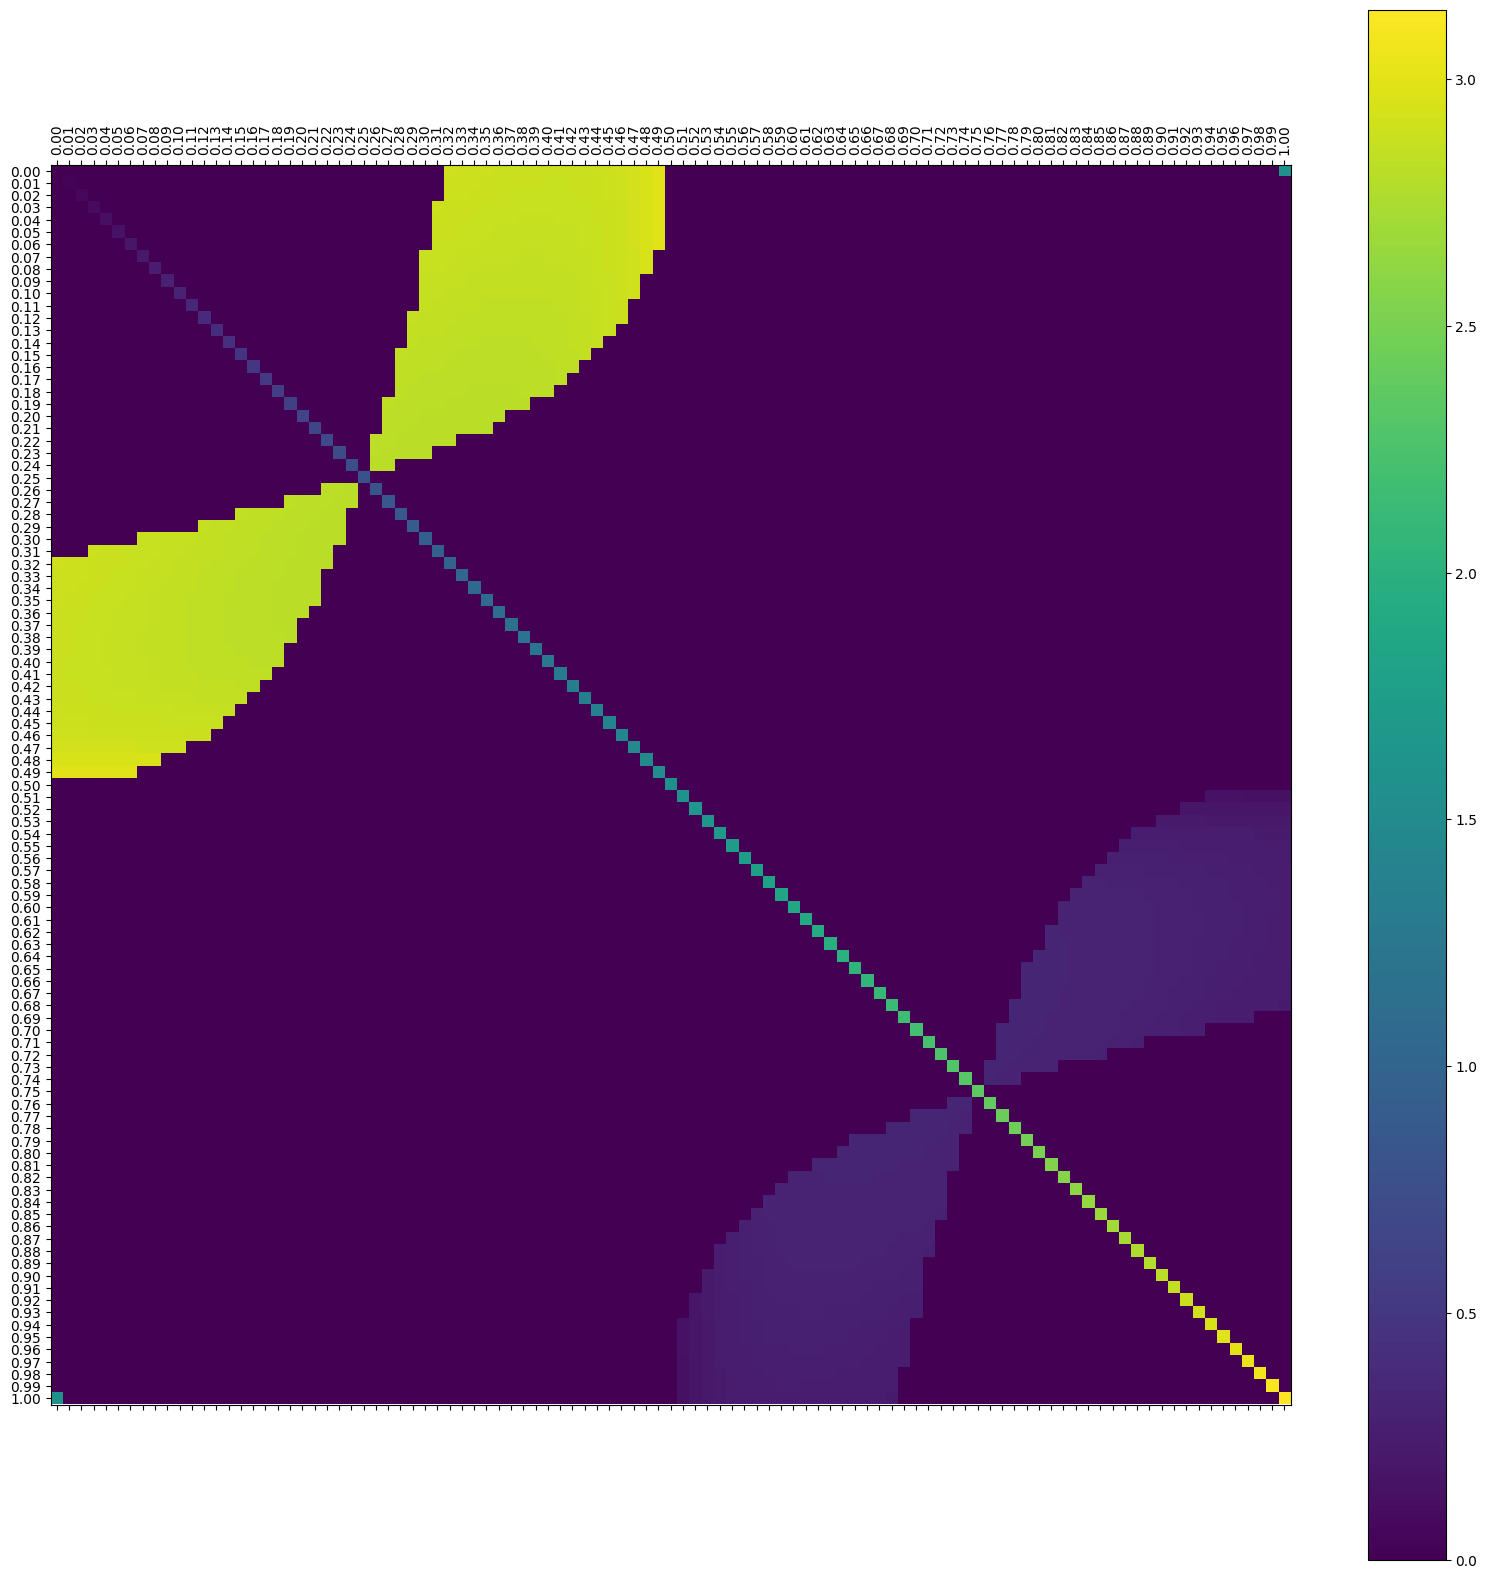

In [93]:
# Sanity check: full range of theta_1 and theta_2 anywhere

theta_1_d = np.linspace(0, np.pi, 101)
theta_2_d = np.linspace(0, np.pi, 101)

my_grid = np.zeros((len(theta_1_d), len(theta_2_d)))
for i, t1 in enumerate(theta_1_d):
    for j, t2 in enumerate(theta_2_d):
        midpoints = get_midpoint_cot(t1, t2)
        if not np.any([is_midpoint(t1, t2, tm) for tm in midpoints]):
            tm = midpoints[0]
            print(f"No midpoint found for {t1 / np.pi:.3f}, {tm / np.pi:.3f}, {t2 / np.pi:.3f}")
            print(np.cos(t2) * np.cos(t1 + tm) ** 2 - np.cos(t1) * np.cos(t2 + tm) ** 2)
        else:
            my_grid[i, j] = midpoints[0]

fig = plt.figure(figsize=(20, 20))
plt.matshow(my_grid, fignum=fig.number, cmap="viridis")
plt.xticks(range(len(theta_1_d)), [f"{t/np.pi:.2f}" for t in theta_1_d], rotation=90)
plt.yticks(range(len(theta_2_d)), [f"{t/np.pi:.2f}" for t in theta_2_d])
plt.colorbar()

0.7775128491442609
2.8183075240160758
0.7695628627988309
2.8168472147797177
0.7615450847676264
2.81546402038442
0.7534562405767754
2.814160949952904
0.7452928885718519
2.8129411849375434
0.7370514064422841
2.8118080924094033
0.728727976425844
2.810765239673323
0.7203185690272798
2.8098164103746965
0.7118189250599986
2.8089656222887687
0.7032245357900466
2.8082171470129667
0.694530620926412
2.8075755318179905
0.685732104159822
2.8070456239552626
0.6768235859021342
2.8066325977684197
0.6677993128183387
2.806341985016621
0.658653143670679
2.806179708889957
0.6493785109065208
2.8061521222851438
0.6399683773144781
2.8062660510168045
0.6304151869420324
2.8065288427709287
0.6207108093060489
2.8069484227689263
0.6108464757268557
2.8075333573114603
0.6008127063658766
2.8082929266218963
0.5905992262316073
2.809237208724441
0.5801948680193751
2.810377176491367
0.5695874591403415
2.81172481050375
0.5587636896383433
2.8132932310269556
0.5477089568393744
2.8150968532559735
0.53640718145778
2.8171515

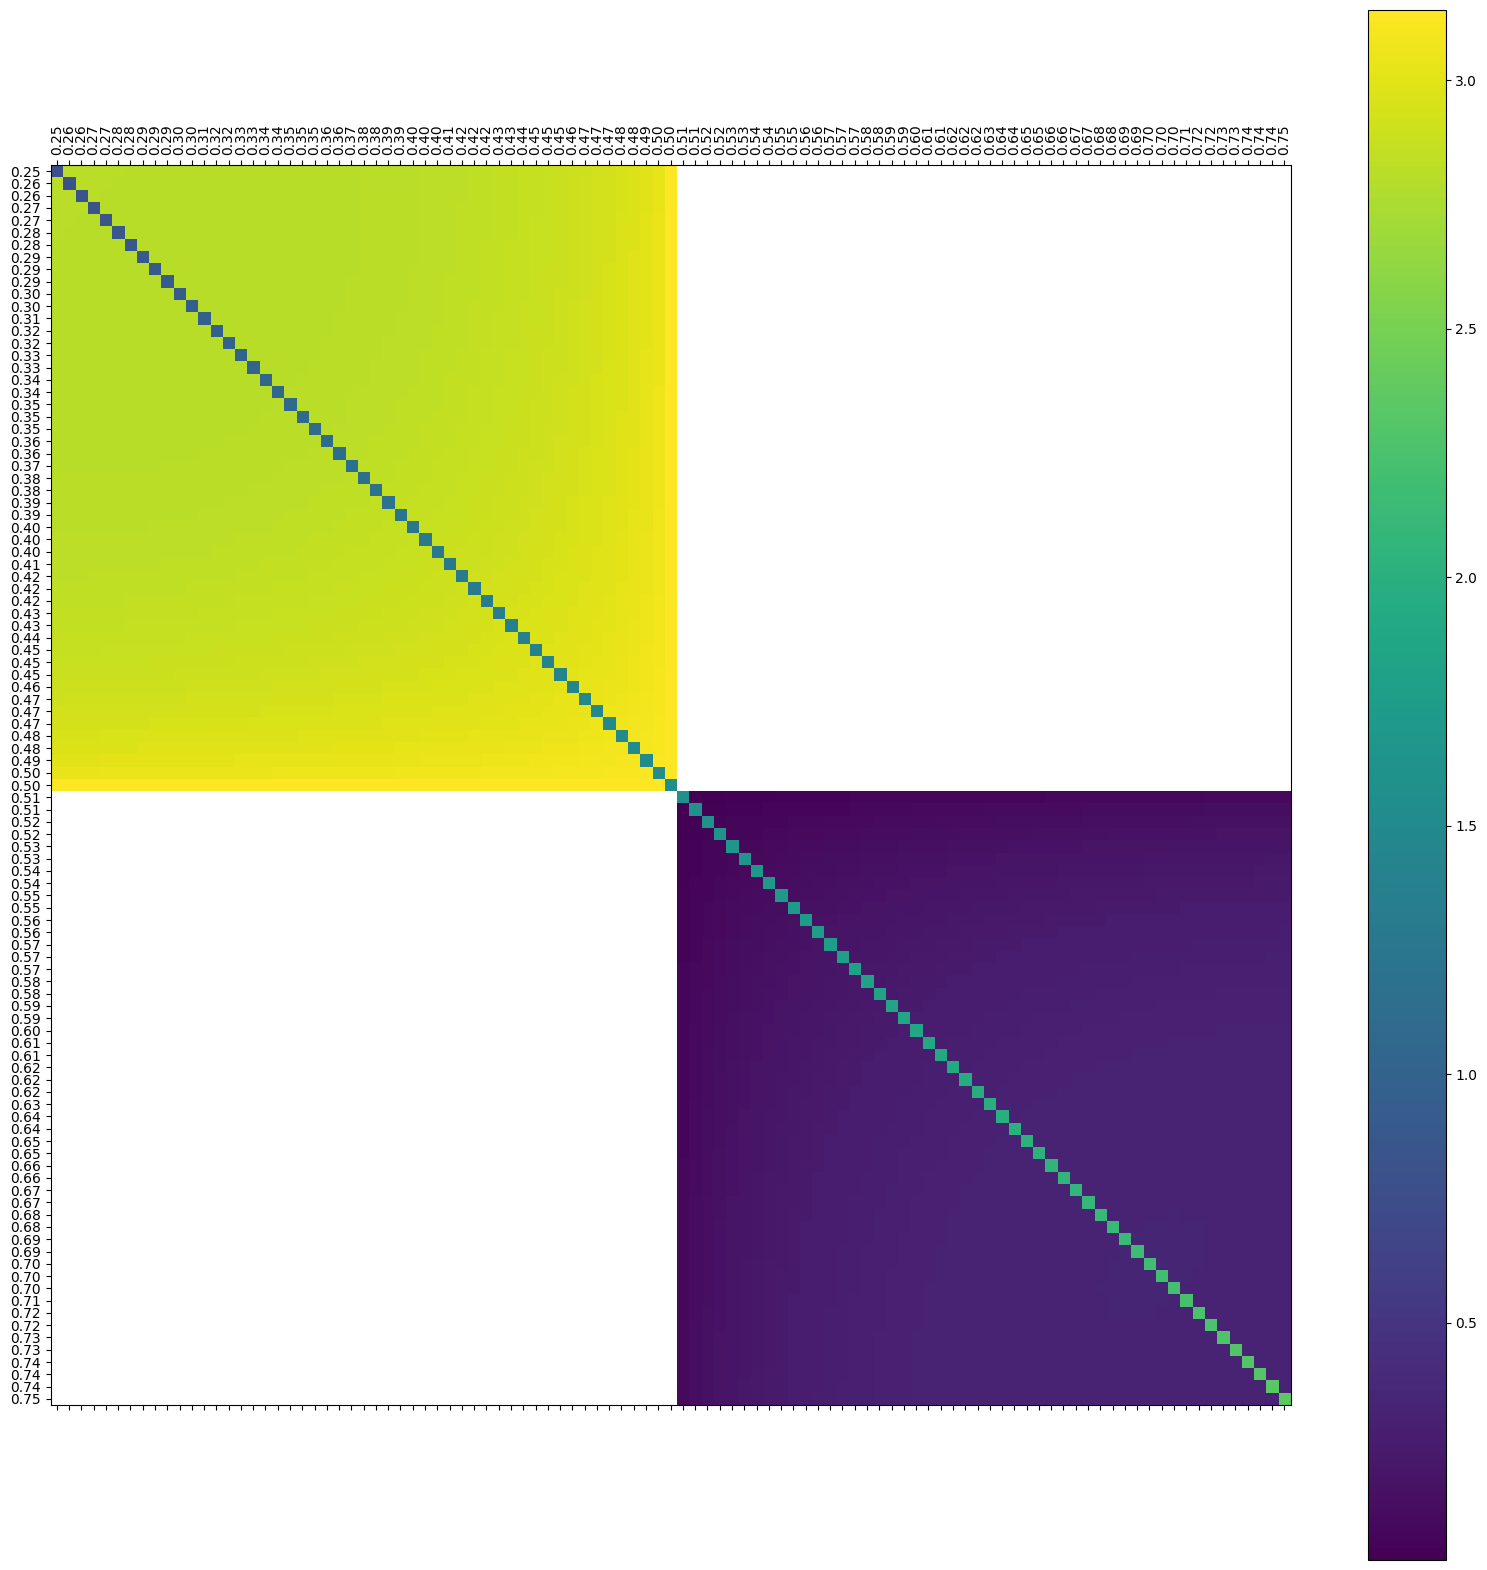

In [143]:
# Literally just plot the solutions

thetas_1 = np.linspace(np.pi / 4, 3 * np.pi / 4, 101)
thetas_2 = np.linspace(np.pi / 4, 3 * np.pi / 4, 101)

my_grid = np.ones((len(thetas_1), len(thetas_2))) * np.nan
for i, t1 in enumerate(thetas_1):
    for j, t2 in enumerate(thetas_2):
        if np.isclose(t1, t2):
            my_grid[i, j] = t1
            continue

        C = np.cos(t1) * np.cos(t2)
        D = np.cos(t1) - np.cos(t2)
        E = np.sin(t1) - np.sin(t2)

        a = -D * (1 + C)
        b = -2 * C * E
        c = C * D

        roots = np.roots([a, b, c])
        roots = roots[np.isreal(roots)]
        # T = [- E/D  +/-  sqrt[  (E/D)^2 + (1+1/C)   ] / (1+1/C)
        # roots = np.array(
        #     [
        #         (-E / D + np.sqrt((E / D) ** 2 + (1 + 1 / C))) / (1 + 1 / C),
        #         (-E / D - np.sqrt((E / D) ** 2 + (1 + 1 / C))) / (1 + 1 / C),
        #     ]
        # )
        arctans = np.arctan(roots)
        arctans[arctans < 0] += np.pi

        for a in arctans:
            print(a)
            # if t1 <= a <= t2 or t2 <= a <= t1:
            my_grid[i, j] = a

fig = plt.figure(figsize=(20, 20))
plt.matshow(my_grid, fignum=fig.number, cmap="viridis")
plt.xticks(range(len(thetas_1)), [f"{t/np.pi:.2f}" for t in thetas_1], rotation=90)
plt.yticks(range(len(thetas_2)), [f"{t/np.pi:.2f}" for t in thetas_2])
plt.colorbar()

In [1]:
import hyperdt